In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import glob
import numpy as np

### Load Images

In [2]:
filenames = glob.glob("photos/*.jpg")
print(f"{len(filenames)} images found")
images = [cv.imread(f) for f in filenames]

27 images found


### Display Images

In [5]:
rows = len(images) // 5
cols = (len(images) // rows) + 1

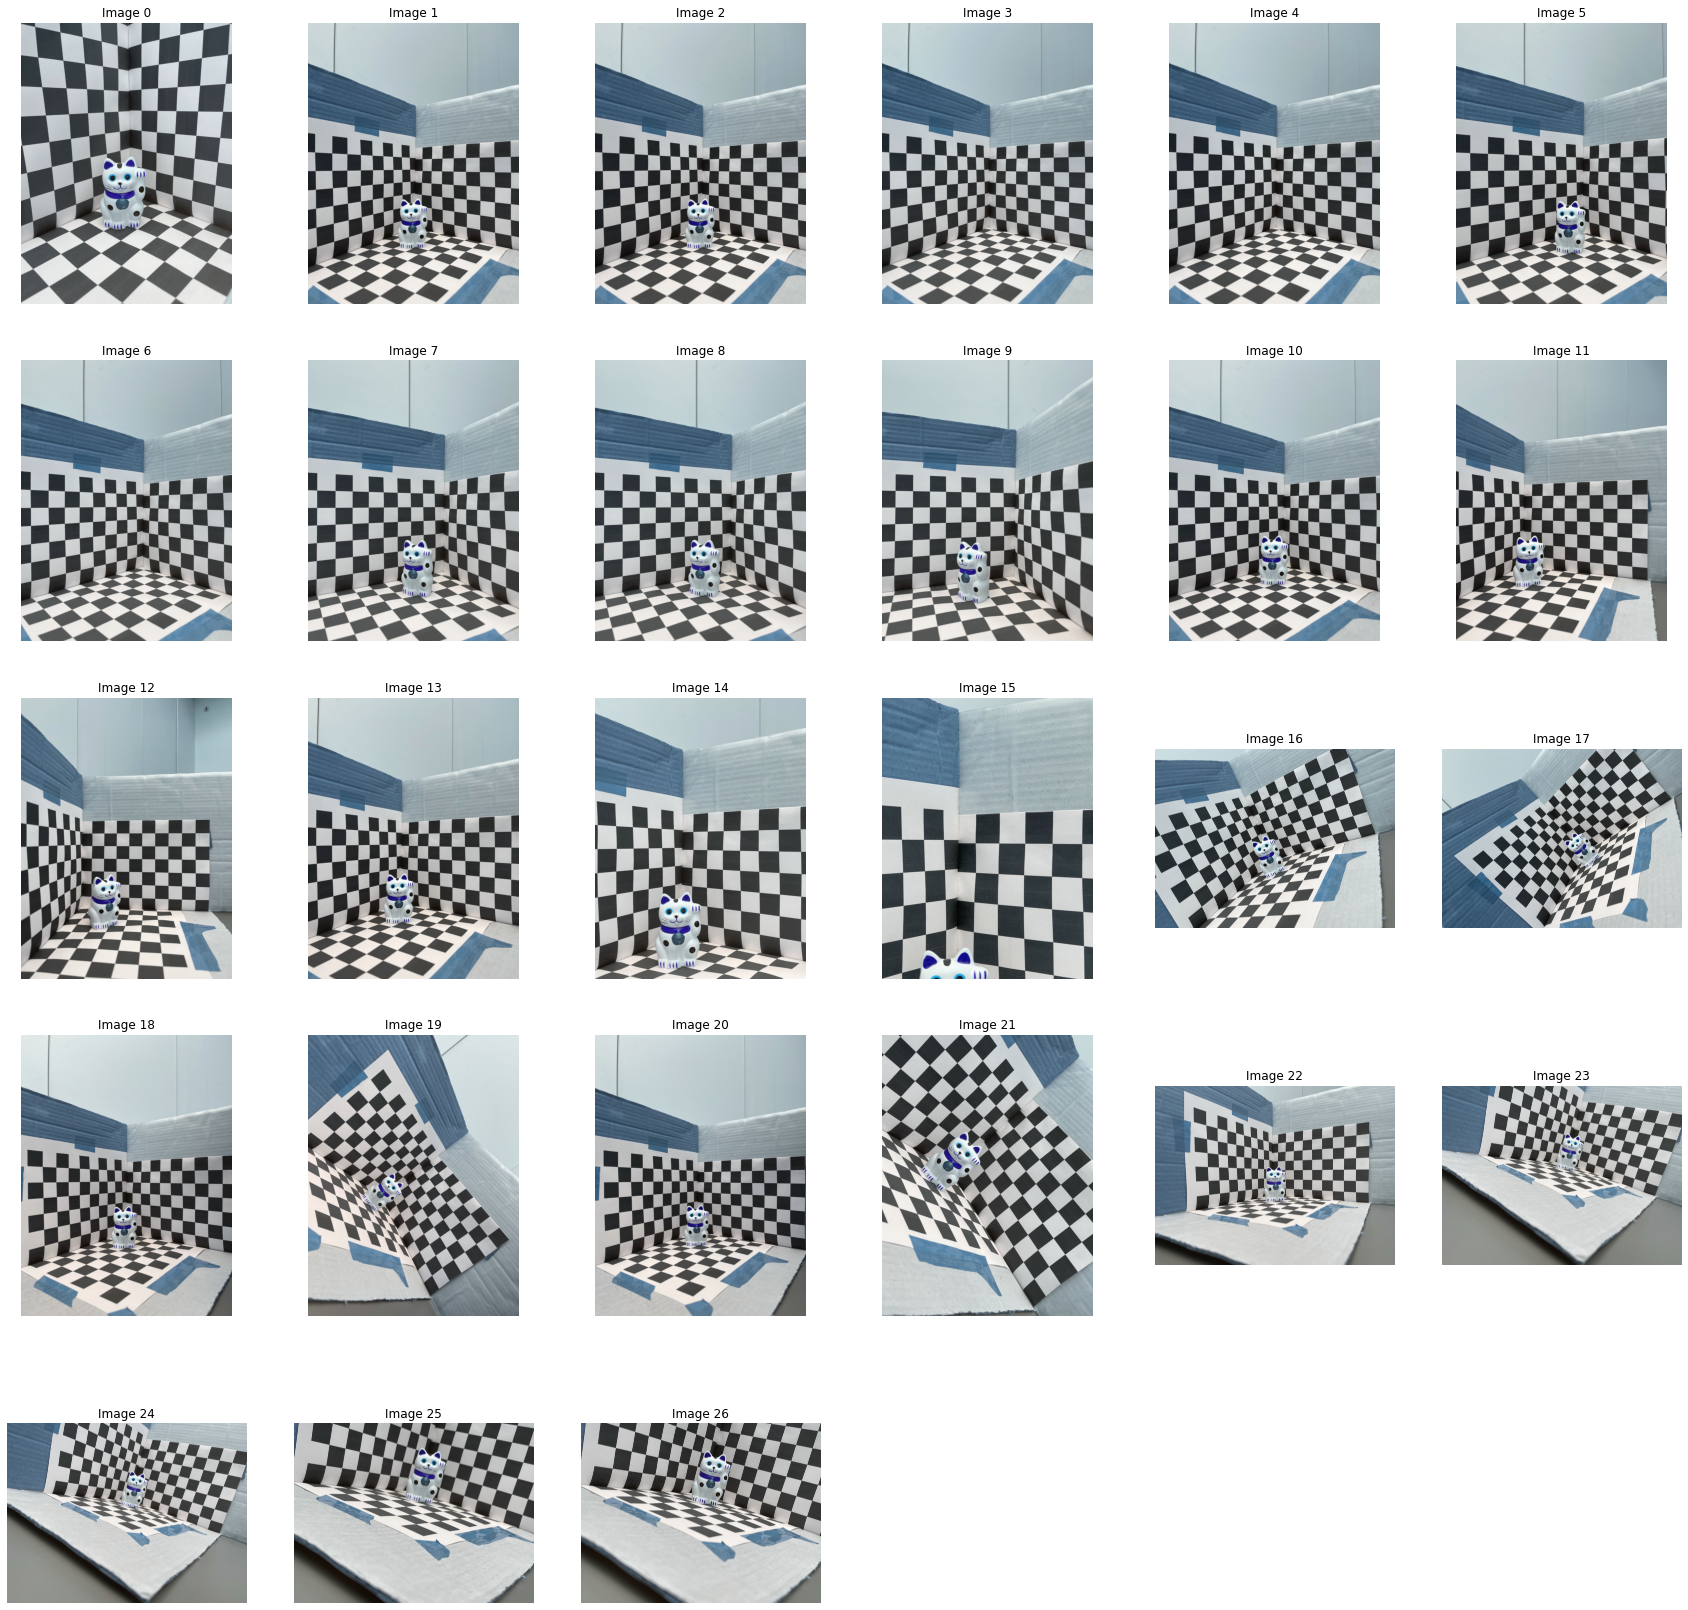

In [6]:
# This cell takes a while to run :( - consider commenting out if re-running notebook

fig = plt.figure(figsize=(30, 30))
for i in range(len(images)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Image {i}")

### Keypoint correspondences between images
Compare quality/quantity of correspondences found by two methods:
- Manual (clicking on corresponding points)
- Automatic (detecting keypoint and matching descriptors)

#### Manual keypoint correspondence

In [ ]:
img1, img2 = images[24], images[25]
# Grid lines at these intervals (in pixels)
# dx and dy can be different
dx, dy = 50,50
# Custom (rgb) grid color
grid_color = [0,0,0]
# Modify the image to include the grid
img1[:,::dy,:] = grid_color
img1[::dx,:,:] = grid_color
img2[:,::dy,:] = grid_color
img2[::dx,:,:] = grid_color

rows, cols = 1,2
fig = plt.figure(figsize=(20,20))
fig.add_subplot(rows, cols, 1)
plt.imshow(img1)
plt.plot(2000, 1050, 'r+', markersize=8)
plt.plot(2100, 800, 'r+', markersize=8)
plt.plot(2300, 850, 'r+', markersize=8)
plt.plot(2025, 1200, 'r+', markersize=8)
plt.plot(750, 1200, 'r+', markersize=8)
plt.plot(2100, 1800, 'r+', markersize=8)
plt.title(f"Image 1")
fig.add_subplot(rows, cols, 2)
plt.imshow(img2)
plt.plot(2025, 800, 'r+', markersize=8)
plt.plot(2150, 400, 'r+', markersize=8)
plt.plot(2450, 500, 'r+', markersize=8)
plt.plot(2050, 1000, 'r+', markersize=8)
plt.plot(150, 1000, 'r+', markersize=8)
plt.plot(2175, 1900, 'r+', markersize=8)
plt.title(f"Image 2")

#### Automatic keypoint correspondence using SIFT

In [ ]:
img1, img2 = images[24], images[25]
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [ ]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1, 1, 1)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [ ]:
rows, cols, channels = img1.shape

print("Image dims:", rows, cols, channels)

idxs = []
for match in good:
    dmatch = match[0]
    img1_idx = dmatch.queryIdx
    img2_idx = dmatch.trainIdx
    pair = (kp1[img1_idx].pt, kp2[img2_idx].pt)
    idxs.append(pair)
    
print(f"{len(idxs)} keypoint pairs")

In [ ]:
irows, icols = 1,2
fig = plt.figure(figsize=(20,20))
fig.add_subplot(irows, icols, 1)
plt.imshow(img1)
for (x, y), _ in idxs:
    plt.plot(x, y, 'r+', markersize=8)
plt.title("Image 1")
fig.add_subplot(irows, icols, 2)
plt.imshow(img2)
for _, (x, y) in idxs:
    plt.plot(x, y, 'r+', markersize=8)
plt.title("Image 2")

### Camera calibration
- Find and report camera parameters.
- Can you estimate or illustrate distortions of your camera?

In [9]:
ret, corners = cv.findChessboardCorners(images[2], (7,10), None)

In [10]:
ret # Currently is false - doesn't work?

False

### Transformation estimation
- Estimate a homography matrix between a pair of images from HG.
    - Show the keypoints and their correspondences projected from the other image.
- Estimate fundamental matrix between a pair of images from FD.
    - Show the keypoints and their corresponding epipolar lines in the other image.
    - Show epipoles, vanishing points and horizon in your images.
- find out how many outliers the estimation method tolerates

### 3D geometry
- Show a stereo rectified pair of your images with epipolar lines.
- Calculate and display depth map of your object estimated from different views.